In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S02W4953_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])


In [11]:
df.head()

,datetime,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
0,2017-07-05 11:00:00,1470.556030,1389.960327,1475.128052,599.853027,0.000000,1604.250000,1238.140991,0.060059,294.700002,...,1018.250000,516.166667,0.0,6.037200,22.816667,24.983333,15.716667,63.833333,34483.333333,2.833333
1,2017-07-05 12:00:00,1470.556152,1391.007935,1475.128052,599.853027,14.714286,596.379700,1238.201050,0.060059,300.549998,...,1018.233337,662.666667,0.0,6.960717,23.466667,25.400000,15.633334,61.166667,33350.000000,2.000000
2,2017-07-05 13:00:00,1470.579590,1391.560547,1475.128052,599.853027,11.562675,801.231201,1238.204956,0.003906,285.750000,...,1018.216675,694.500000,0.0,5.372850,23.983333,26.283333,15.466667,58.500000,36666.666667,1.666667
3,2017-07-05 14:00:00,1470.579956,1392.567749,1475.128052,599.853027,0.089636,960.882324,1238.204956,0.000000,294.550003,...,1018.250000,812.666667,0.0,9.047567,24.233333,27.116667,15.483333,57.833333,35400.000000,1.666667
4,2017-07-05 15:00:00,1470.581055,1393.423828,1475.128052,599.853027,0.000000,837.653625,1238.208984,0.004028,311.250000,...,1018.366669,811.000000,0.0,9.430167,23.950000,26.583334,14.983333,56.833333,35000.000000,1.500000


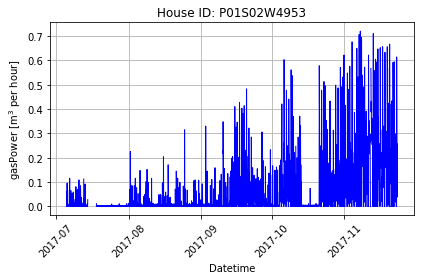

In [81]:
plt.title('House ID: P01S02W4953')

plt.plot(df['datetime'][:], df['gasPower'][:], '-', color='b', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('gasPower [m$^3$ per hour]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('sample1.png', dpi=500)

plt.show()

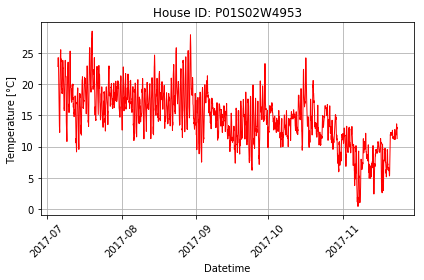

In [80]:
plt.title('House ID: P01S02W4953')

plt.plot(df['datetime'][:], df['T'][:], '-', color='r', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('Temperature [°C]')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('sample2.png', dpi=1000)

plt.show()

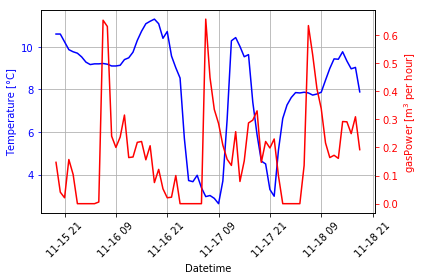

In [4]:
fig, ax1 = plt.subplots()
t = df['datetime'][3200:3272]
ax1.plot(t, df['T'][3200:3272], 'b-')
ax1.set_xlabel('Datetime')
plt.xticks(rotation=45)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temperature [°C]', color='b')
ax1.tick_params('y', colors='b')
plt.grid()

ax2 = ax1.twinx()
ax2.plot(t, df['gasPower'][3200:3272], 'r-')
ax2.set_ylabel('gasPower [m$^3$ per hour]', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.savefig('sample3.png', dpi=1000)
plt.show()